# Toy MC
## Define the number of tracks
The number of tracks generated for this toy MC is

In [8]:
n_tracks = 1000

## Generate a number of residuals
Residuals should be normally distributed with a sigma of 270 microns

In [9]:
import numpy as np

spacial_resolution = np.random.normal(0,270,n_tracks)

## Generate vertices
Vertices are uniformly distributed in the x-y plane at z = 0

In [10]:
x_coords = np.random.uniform(-10,10,n_tracks)
y_coords = np.random.uniform(-10,10,n_tracks)

## Plot vertices and residuals

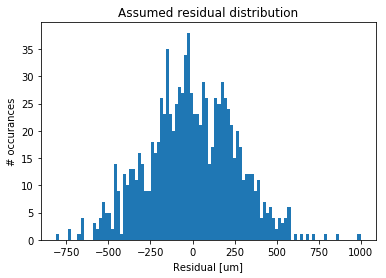

In [11]:
import matplotlib.pyplot as plt

plt.hist(spacial_resolution,bins=100)
plt.title("Assumed residual distribution")
plt.xlabel("Residual [um]")
plt.ylabel("# occurances")
plt.show()

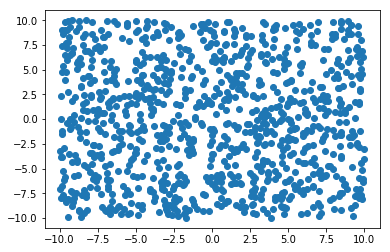

In [12]:
plt.scatter(x_coords,y_coords)
plt.show()

# Define drift tube module

In [13]:
import geotools.Vector as Vector
import geotools.Position as Position
import geotools.Units as u

class Drifttube:
    def __init__(self,pos_upper,pos_lower):
        self._pos_lower = pos_lower
        self._pos_upper = pos_upper
        self._wire_direction = pos_upper.vector_to(pos_lower).to_unity()
        self._wire_length = 1.6 * u.m
        
    def get_wire_direction(self):
        return self._wire_direction
    
    def get_length(self):
        return self._wire_length

class Module:
    def __init__(self):
        self._tubes = []

In [14]:
tube1 = Drifttube(Position(0,1,0),Position(0,0,0))
wire_dir = tube1.get_wire_direction()